In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import random as rd
import pandas as pd
import numpy as np

In [3]:
dataf = pd.read_csv("results/responses.csv")
exec_dfModal = pd.read_csv("results/execTimeMultimodal.csv")
exec_dfCriteria = pd.read_csv("results/execTimeMultiCriteria.csv")

In [4]:
# remove later
dataf.rename(columns = {"distance":"length"},inplace=True)

In [5]:
def getBars(df,labels,value):
    bars = []
    for i in labels:
        bars.append(df.groupby("modal").get_group(i)[value].tolist())
    return bars

def plotBarSubPlot(group,ylabels,translator,labels,title,fname=None):
    fig, axs = plt.subplots(1,4)
    barWidth = 0.2
    sns.set(style="white")

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]

    for sub in range(len(ylabels)):
        bars = getBars(group,labels,ylabels[sub])
        print(f'{ylabels[sub]} {sub}',bars)
        r1 = np.arange(len(bars[0]*2),step=2)
        for i in range(len(bars)): 
            #axs[sub].set_title(sub)
            axs[sub].bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i],hatch=patterns[i])
            r1 = [x + barWidth for x in r1]

            axs[sub].set_xlabel(translator[ylabels[sub]], fontweight='bold')
            axs[sub].set_xticks([])

    sns.despine()
    plt.rcParams["figure.figsize"] = (12,3)
    # Create legend & Show graphic
    plt.legend(loc="upper right",bbox_to_anchor=(-0.75,1.37),fancybox=True,shadow=True,ncol=3)
    fig.suptitle(title,fontsize =20,fontweight='bold',y=1.24)
    if fname != None: plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()
    plt.close()

def plotBars(bars, ylabel, labels, fluxos, title, fname=None):
    # set width of bar
    barWidth = 0.2
    sns.set(style="white")

    plt.title(title,fontsize =20,fontweight='bold',y=1.40)

    patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
    colors = ["#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d","#B8860B","#2d7f5e","#7f6d5f","#557f2d"]
    
    r1 = np.arange(len(bars[0]*2),step=2)
    for i in range(len(bars)): # bar number per flow

        plt.bar(r1, bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i],hatch=patterns[i])
        r1 = [x + barWidth for x in r1]
    
    # Add xticks on the middle of the group bars
    plt.xlabel('Routes', fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.xticks([2*r + 4*barWidth for r in range(len(bars[0]))], fluxos)
 
    # Create legend & Show graphic
    plt.legend(loc="upper center",bbox_to_anchor=(0.26,1.37),fancybox=True,shadow=True,ncol=3)
    
    sns.despine()
    plt.rcParams["figure.figsize"] = (12,3)
    
    if fname != None: plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()
    plt.close()

def plotBoxPlotsClean(df,ref,label,title,x,fname=None):
    plt.figure()
    sns.set(style="darkgrid")
    plt.title(title,fontweight='bold')
    a = sns.boxplot(data=df,x=x,y=ref,hue=ref,dodge=False,showfliers = False)
    a.legend_.remove()
    plt.xlabel(label)
    upper = ref[0].upper() + ref[1:]
    plt.ylabel(upper)
    if fname != None: plt.savefig('results/plots/'+fname+"Clean.pdf",bbox_inches="tight")
    plt.show()

def plotBoxPlots(df,ref,label,title,x,fname=None):
    plt.figure()
    sns.set(style="darkgrid")
    flierprops = {"marker":"d",
                'markeredgecolor': 'none',
                'markerfacecolor': 'grey'}
    plt.title(title,fontweight='bold')
    a = sns.boxplot(data=df,x=x,y=ref,hue=ref,flierprops=flierprops,dodge=False)
    a.legend_.remove()
    plt.xlabel(label)
    upper = ref[0].upper() + ref[1:]
    plt.ylabel(upper)
    if fname != None: plt.savefig('results/plots/'+fname+".pdf",bbox_inches="tight")
    plt.show()

def divide_range(min_val, max_val):

    divisions = np.linspace(min_val, max_val, 4)
    windows = [(divisions[i]) for i in range(3)]

    return windows

def normalize(array_data):
    max_data = np.amax(array_data)
    min_data = np.amin(array_data)
    #return list(map(lambda i: (max_data - i) / (max_data - min_data), array_data))
    return list(map(lambda i: (i-min_data) / (max_data - min_data),array_data))

In [6]:
## dataset filtering

rmLabels = ['Unnamed: 0','setID','modal']
ylabels = dataf.columns
ylabels = [ele for ele in ylabels if ele not in rmLabels]

removeID = dataf.loc[dataf['modal'] == 'error']['setID'].to_list() # remove setID with error
dataf_new = dataf.drop(dataf[dataf['setID'].isin(removeID)].index)

dataf_new['duration'] = dataf_new['duration'].apply(lambda x: x/60)
dataf_new['length'] = dataf_new['length'].apply(lambda x: x/1000)

normalization = lambda x: (x-x.mean())/ x.std()

dataf_new["duration_norm"] = dataf_new.groupby("setID")["duration"].transform(normalize)
dataf_new["length_norm"] = dataf_new.groupby("setID")["length"].transform(normalize)
dataf_new["emission_norm"] = dataf_new.groupby("setID")["emission"].transform(normalize)
dataf_new["price_norm"] = dataf_new.groupby("setID")["price"].transform(normalize)

dataf_new.rename(columns={"Unnamed: 0": "index"},inplace=True)

dataf_new['modal'] = dataf_new['modal'].replace(['transit'], 'public transport')
dataf_new['modal'] = dataf_new['modal'].replace(['car-transit'], 'car-public transport')
dataf_new['modal'] = dataf_new['modal'].replace(['bicycle-transit'], 'bicycle-public transport')

dataf_new['modal'] = dataf_new['modal'].replace(['transit-car'], 'public transport-car')
dataf_new['modal'] = dataf_new['modal'].replace(['transit-bicycle'], 'public transport-bicycle')

labels = dataf_new['modal'].unique().tolist()
if "error" in labels: labels.remove("error")

dataf_new.to_csv("results/filtered_responses.csv",index=False)

In [7]:
## separating data by window

dataf_median = dataf_new.groupby("setID")['length'].median()
distance_wind = divide_range(min(dataf_median), max(dataf_median))

series_wind1 = dataf_median.loc[dataf_median <= distance_wind[1]]
series_wind2 = dataf_median.loc[(dataf_median > distance_wind[1]) & (dataf_median <= distance_wind[2])]
series_wind3 = dataf_median.loc[dataf_median > distance_wind[2]]

windows = [series_wind1,series_wind2,series_wind3]

print(distance_wind,dataf_new['length'].max())
print([i.shape[0] for i in windows])

[4.465, 15.458666666666664, 26.45233333333333] 67.274
[67, 64, 6]


group 1
duration 0 [[18.333333333333332], [65.0], [42.61666666666667], [55.083333333333336], [31.65], [36.93333333333333], [46.583333333333336], [30.483333333333334], [71.28333333333333]]
length 1 [[10.524], [14.904], [10.013], [14.91], [10.525], [12.064], [11.376], [10.013], [18.38]]
emission 2 [[7.077], [16.0784257886208], [0.0], [17.449655928448], [7.077], [15.123764489890132], [8.046764489890133], [7.077], [14.367449990126929]]
price 3 [[24.46453333333333], [4.0], [13.654166666666669], [19.604333333333333], [23.996], [18.169833333333333], [11.395833333333332], [23.25713333333333], [12.320833333333333]]


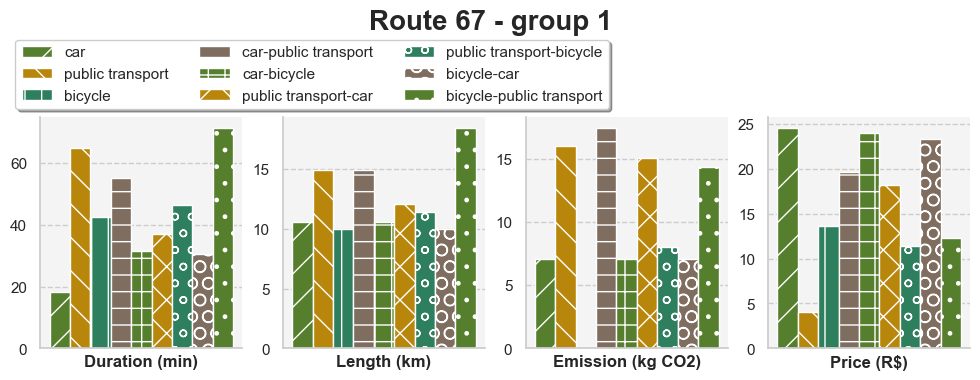

group 2
duration 0 [[15.683333333333334], [44.0], [65.36666666666666], [53.65], [47.15], [46.166666666666664], [79.8], [38.916666666666664], [68.83333333333333]]
length 1 [[11.675], [14.899], [15.748], [21.227], [15.651], [12.131], [16.795], [11.326], [20.68]]
emission 2 [[7.248], [16.07303179177813], [0.0], [23.778442724036264], [7.248], [14.253723099255469], [7.005723099255466], [7.248], [13.8161835128064]]
price 3 [[25.298333333333336], [4.0], [19.341666666666665], [19.5377], [28.6627], [20.069766666666663], [17.95], [23.418066666666668], [15.208333333333334]]


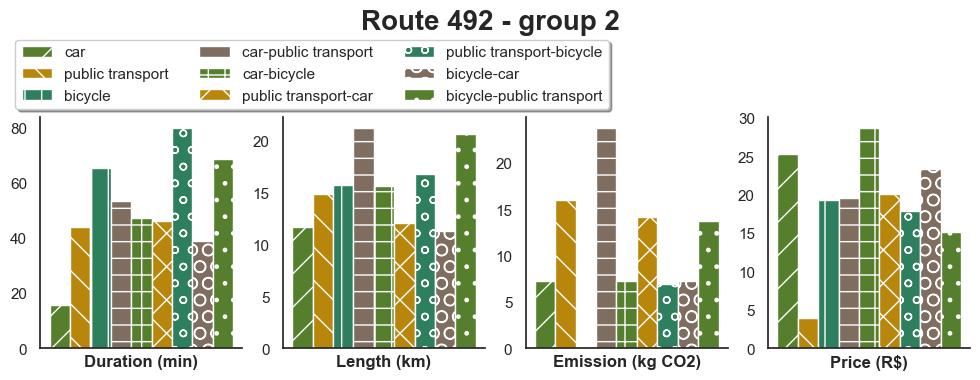

group 3
duration 0 [[42.25], [95.0], [123.78333333333333], [150.95], [121.61666666666666], [91.68333333333334], [137.36666666666667], [85.58333333333333], [133.86666666666667]]
length 1 [[45.191], [51.374], [27.239], [67.274], [46.312], [30.307], [28.757], [28.788], [37.446]]
emission 2 [[25.214], [55.42223875903147], [0.0], [73.4460409677568], [25.214], [38.40555867842559], [13.191558678425595], [25.214], [25.6614005793024]]
price 3 [[75.5108], [4.0], [33.94583333333333], [45.022000000000006], [68.93866666666668], [39.87353333333334], [24.591666666666665], [50.26353333333333], [23.466666666666665]]


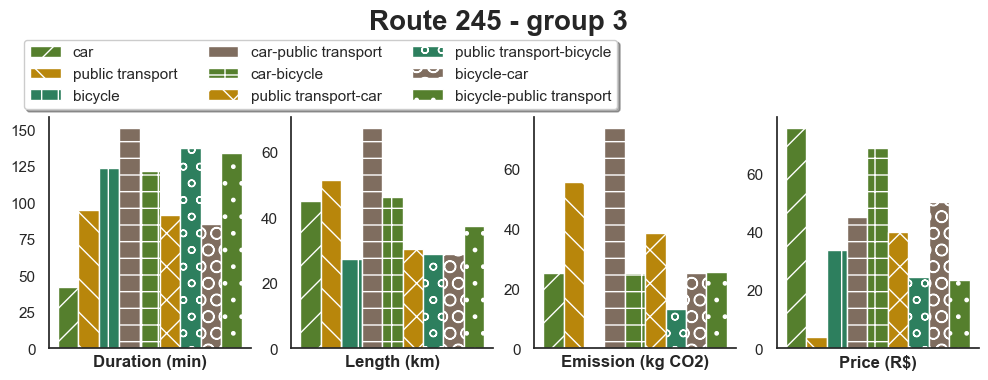

In [40]:
rd.seed(10)

translator = {"length": "Length (km)","duration": "Duration (min)","price": "Price (R$)", "emission": "Emission (kg CO2)"}

for j in range(len(distance_wind)):
    print("group",j+1)
    sampl = rd.sample(sorted(windows[j].index),1)
    
    group = dataf_new.loc[dataf_new['setID'].isin(sampl)] # group data by sample
    route = f"Route {int(sampl[0])}"
    title = f"{route} - group {j+1}"
    plotBarSubPlot(group,ylabels,translator,labels,title,fname=title)

group 1
smp of setIDs [67.0, 505.0, 566.0, 48.0]
[[11.85, 18.333333333333332, 16.866666666666667, 17.333333333333332], [29.0, 65.0, 67.0, 66.0], [26.0, 42.61666666666667, 58.833333333333336, 48.083333333333336], [22.966666666666665, 55.083333333333336, 65.76666666666667, 48.7], [19.183333333333334, 31.65, 39.28333333333333, 32.3], [22.2, 36.93333333333333, 40.983333333333334, 49.38333333333333], [30.133333333333333, 46.583333333333336, 59.78333333333333, 67.36666666666666], [18.45, 30.483333333333334, 36.93333333333333, 32.93333333333333], [27.45, 71.28333333333333, 83.01666666666667, 65.2]]
['duration', 'length', 'emission', 'price']
['Route 67', 'Route 505', 'Route 566', 'Route 48']


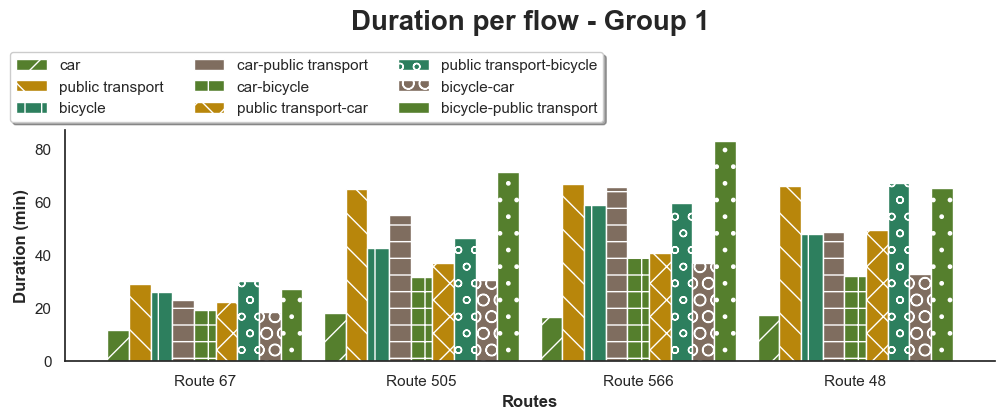

[[6.597, 10.524, 13.368, 11.243], [6.501, 14.904, 15.568, 17.728], [6.212, 10.013, 13.709, 11.383], [6.457, 14.91, 19.88, 12.617], [6.329, 10.525, 13.71, 11.243], [7.1, 12.064, 15.517, 19.395], [6.833, 11.376, 14.135, 17.553], [6.479, 10.013, 13.368, 11.383], [6.19, 18.38, 19.881, 12.755]]
['duration', 'length', 'emission', 'price']
['Route 67', 'Route 505', 'Route 566', 'Route 48']


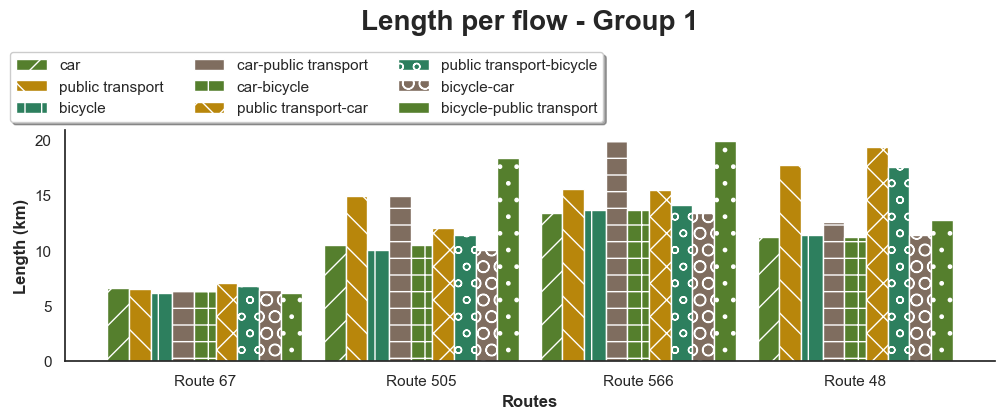

[[4.558, 7.077, 8.134, 7.335], [7.013274694835202, 16.0784257886208, 16.79474856932693, 19.124955205358933], [0.0, 0.0, 0.0, 0.0], [7.922775230455466, 17.449655928448, 22.3547332760064, 14.8855167803648], [4.558, 7.077, 8.134, 7.335], [8.4546233191424, 15.123764489890132, 16.5356894821376, 18.959063195946666], [3.8966233191424, 8.046764489890133, 8.4016894821376, 11.624063195946666], [4.558, 7.077, 8.134, 7.335], [3.293574472132267, 14.367449990126929, 14.030864587144531, 7.6281903348992]]
['duration', 'length', 'emission', 'price']
['Route 67', 'Route 505', 'Route 566', 'Route 48']


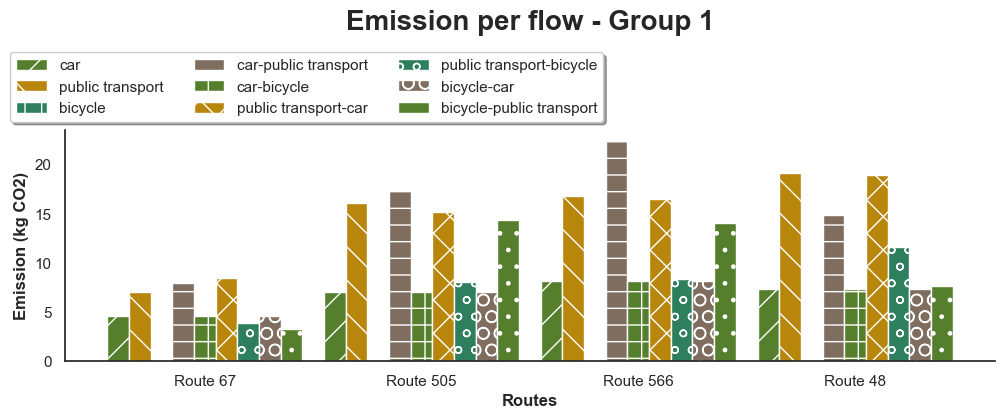

[[17.7386, 24.46453333333333, 27.795066666666667, 25.14923333333333], [4.0, 4.0, 4.0, 4.0], [9.5, 13.654166666666669, 17.708333333333336, 15.020833333333334], [16.281066666666668, 19.604333333333333, 21.09906666666667, 19.9284], [18.33523333333333, 23.996, 27.728233333333336, 24.5784], [16.034399999999998, 18.169833333333333, 22.993533333333332, 24.25183333333333], [10.283333333333331, 11.395833333333332, 14.445833333333333, 14.341666666666669], [18.1571, 23.25713333333333, 26.874233333333333, 24.842033333333333], [10.3625, 12.320833333333333, 14.254166666666666, 13.3]]
['duration', 'length', 'emission', 'price']
['Route 67', 'Route 505', 'Route 566', 'Route 48']


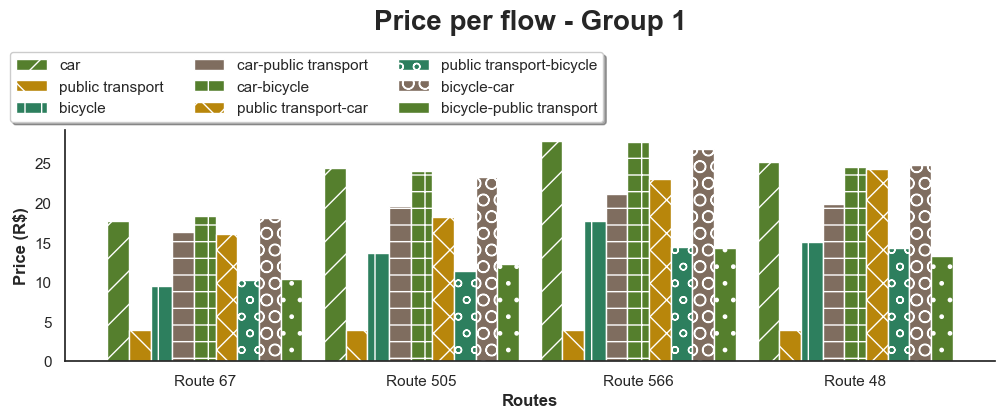

group 2
smp of setIDs [272.0, 563.0, 584.0, 303.0]
[[22.466666666666665, 13.833333333333334, 23.683333333333334, 21.5], [85.0, 53.0, 72.0, 55.0], [59.2, 48.95, 60.7, 55.36666666666667], [41.63333333333333, 59.016666666666666, 68.53333333333333, 75.91666666666667], [44.78333333333333, 47.166666666666664, 41.516666666666666, 61.45], [46.766666666666666, 36.68333333333333, 42.85, 58.416666666666664], [103.81666666666666, 75.61666666666666, 64.65, 59.266666666666666], [42.25, 31.233333333333334, 43.833333333333336, 52.016666666666666], [73.53333333333333, 66.53333333333333, 88.46666666666667, 64.93333333333334]]
['duration', 'length', 'emission', 'price']
['Route 272', 'Route 563', 'Route 584', 'Route 303']


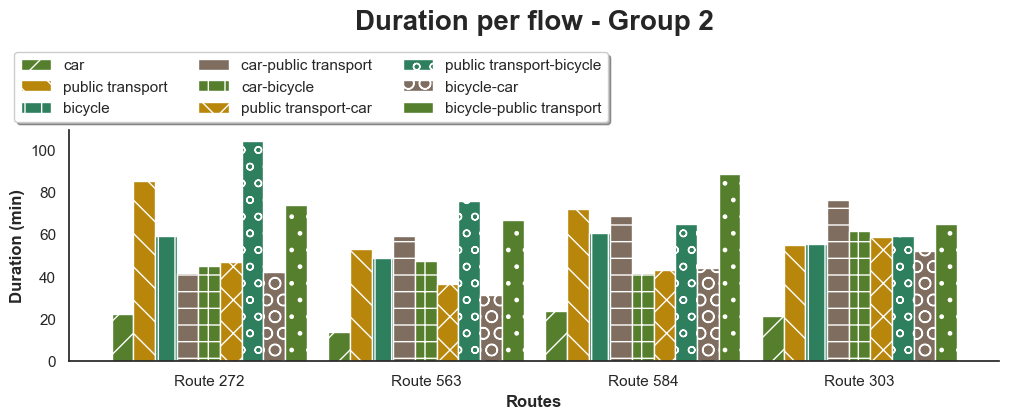

[[19.665, 16.267, 14.469, 27.931], [24.163, 23.74, 22.678, 15.068], [12.466, 11.598, 13.521, 12.51], [18.527, 22.043, 17.56, 31.634], [17.834, 17.254, 14.469, 24.959], [20.194, 15.635, 20.934, 44.485], [22.807, 14.357, 19.951, 13.905], [13.397, 11.598, 13.514, 36.745], [16.458, 12.672, 18.581, 17.273]]
['duration', 'length', 'emission', 'price']
['Route 272', 'Route 563', 'Route 584', 'Route 303']


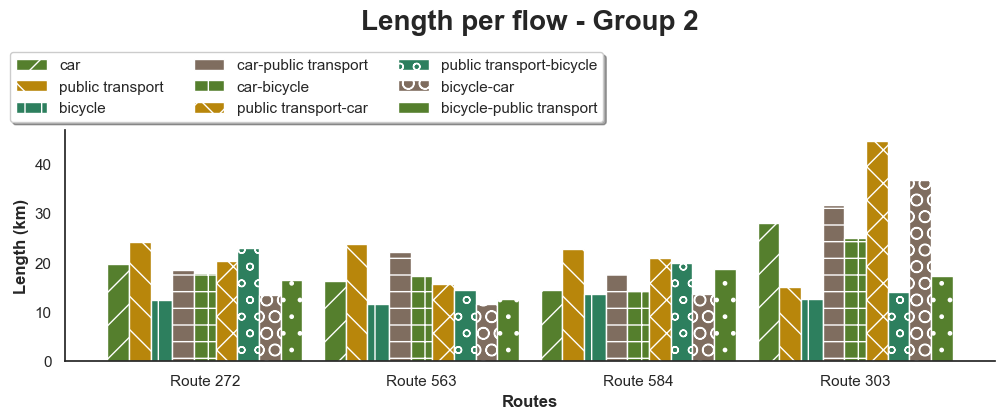

[[11.6, 8.876, 9.575, 14.856], [26.067029141870933, 25.610697008981333, 24.46501207959893, 16.25534888506027], [0.0, 0.0, 0.0, 0.0], [20.96397851886933, 23.832474445346136, 20.69634269021013, 33.86876007103147], [11.6, 8.876, 9.575, 14.856], [20.1991097665792, 11.075671912439466, 21.995217129924264, 22.868242910097067], [8.5991097665792, 2.1996719124394666, 12.420217129924264, 8.012242910097065], [11.6, 8.876, 9.575, 14.856], [11.030723543253334, 7.415666859298134, 12.760038931012264, 11.808537887965866]]
['duration', 'length', 'emission', 'price']
['Route 272', 'Route 563', 'Route 584', 'Route 303']


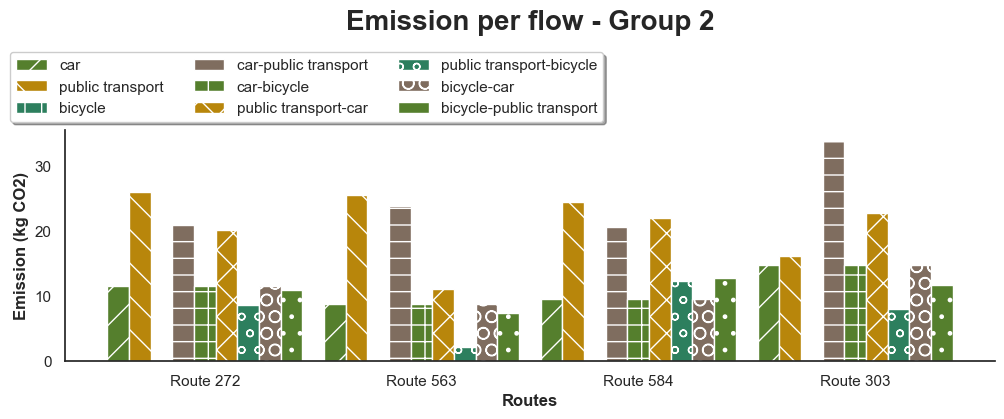

[[37.38116666666667, 30.805433333333337, 30.930533333333333, 47.88530000000001], [4.0, 4.0, 4.0, 4.0], [17.8, 15.2375, 18.175, 16.84166666666667], [25.90943333333333, 22.83686666666667, 22.509633333333333, 31.642166666666665], [33.196933333333334, 31.624366666666667, 29.005466666666667, 42.7755], [29.531566666666667, 31.29563333333333, 26.4098, 65.22956666666667], [24.704166666666666, 20.15416666666667, 16.4125, 14.066666666666666], [29.0757, 24.54833333333333, 28.94763333333333, 61.74756666666667], [15.133333333333333, 12.883333333333333, 15.116666666666667, 13.733333333333334]]
['duration', 'length', 'emission', 'price']
['Route 272', 'Route 563', 'Route 584', 'Route 303']


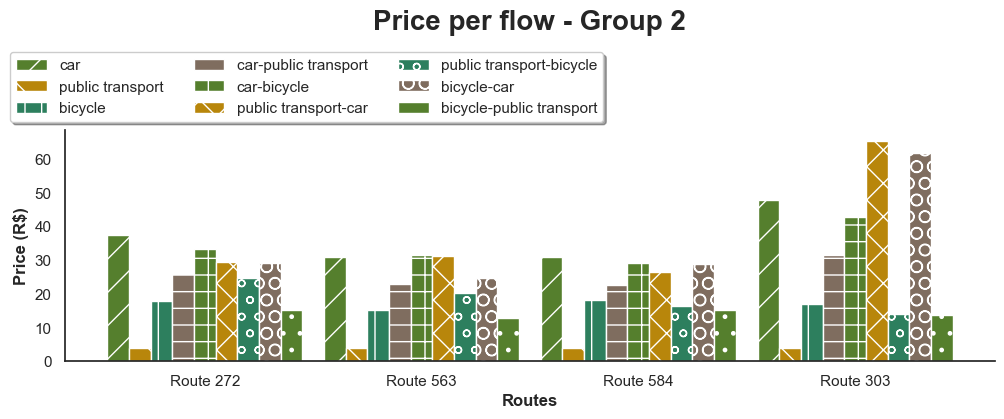

group 3
smp of setIDs [588.0, 178.0, 171.0, 241.0]
[[37.46666666666667, 36.25, 27.983333333333334, 31.183333333333334], [106.0, 87.0, 88.0, 87.0], [104.9, 100.18333333333334, 113.31666666666666, 92.86666666666666], [95.78333333333333, 103.71666666666667, 110.13333333333334, 129.28333333333333], [71.93333333333334, 77.9, 73.3, 132.16666666666666], [78.03333333333333, 66.9, 67.58333333333333, 77.1], [114.48333333333333, 91.31666666666666, 120.58333333333333, 102.06666666666666], [68.98333333333333, 66.85, 72.31666666666666, 71.95], [116.28333333333333, 106.71666666666667, 139.51666666666668, 92.06666666666666]]
['duration', 'length', 'emission', 'price']
['Route 588', 'Route 178', 'Route 171', 'Route 241']


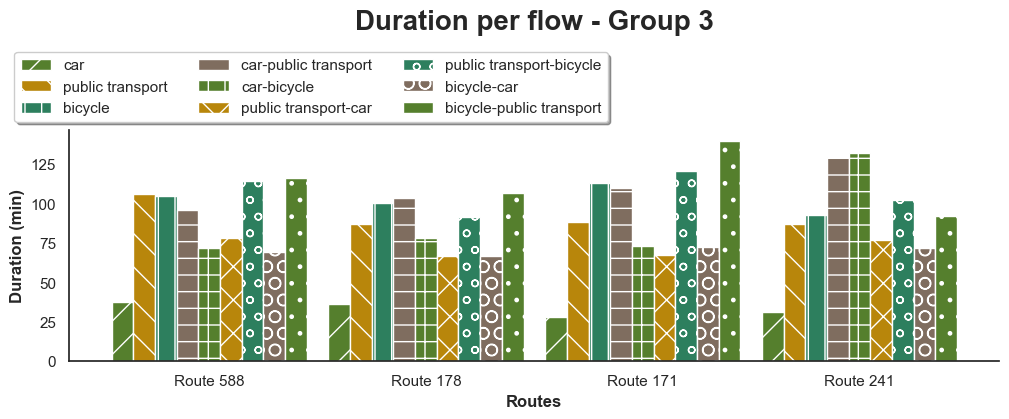

[[26.94, 28.911, 33.393, 36.754], [29.245, 28.281, 38.737, 25.249], [24.42, 22.378, 26.35, 20.046], [28.77, 35.445, 51.532, 57.705], [24.799, 28.103, 30.466, 43.945], [29.95, 24.821, 32.583, 27.581], [27.247, 24.159, 32.036, 23.431], [27.123, 23.141, 26.897, 31.406], [27.218, 27.43, 37.404, 23.122]]
['duration', 'length', 'emission', 'price']
['Route 588', 'Route 178', 'Route 171', 'Route 241']


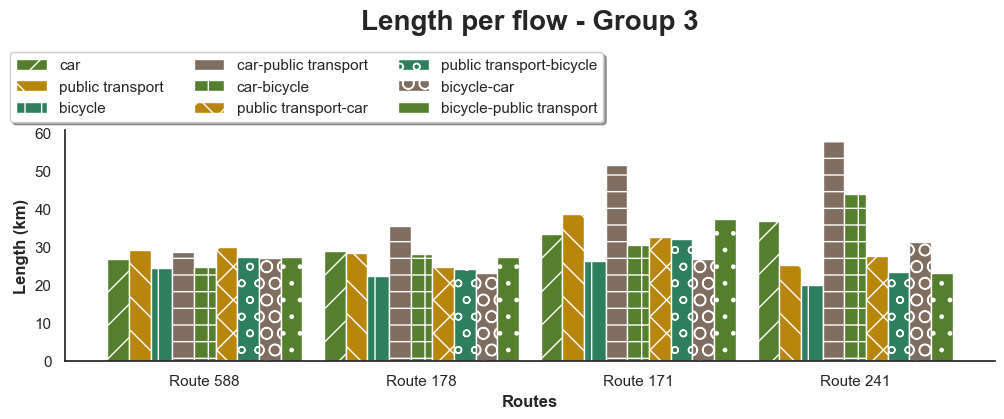

[[16.688, 17.453, 18.01, 20.263], [31.549487532757325, 30.5095249414912, 41.78945113887573, 27.23860525609813], [0.0, 0.0, 0.0, 0.0], [33.1903939404544, 40.0948411467776, 55.61478838833493, 62.68031237136215], [16.688, 17.453, 18.01, 20.263], [32.61863027513173, 32.65004670452907, 33.738894793216, 33.91952120626347], [15.930630275131731, 15.197046704529068, 15.728894793215996, 13.656521206263466], [16.688, 17.453, 18.01, 20.263], [16.1916997223168, 17.5056773531904, 26.124205508403207, 14.132271727786662]]
['duration', 'length', 'emission', 'price']
['Route 588', 'Route 178', 'Route 171', 'Route 241']


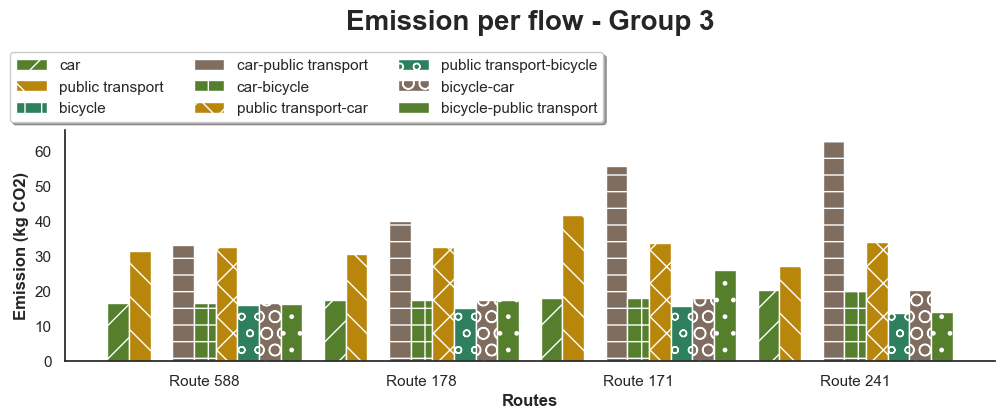

[[50.58866666666668, 52.84680000000001, 56.60673333333334, 61.77603333333334], [4.0, 4.0, 4.0, 4.0], [29.225, 28.04583333333333, 31.329166666666666, 26.216666666666665], [33.41073333333333, 33.42326666666666, 35.40953333333333, 37.42263333333334], [44.69823333333333, 47.4691, 49.2012, 66.14346666666667], [34.19623333333333, 29.3792, 39.24973333333334, 34.8736], [20.370833333333334, 18.329166666666666, 25.89583333333333, 18.516666666666666], [45.83403333333334, 41.4319, 45.10086666666666, 54.986700000000006], [20.070833333333333, 19.429166666666667, 21.129166666666663, 17.766666666666666]]
['duration', 'length', 'emission', 'price']
['Route 588', 'Route 178', 'Route 171', 'Route 241']


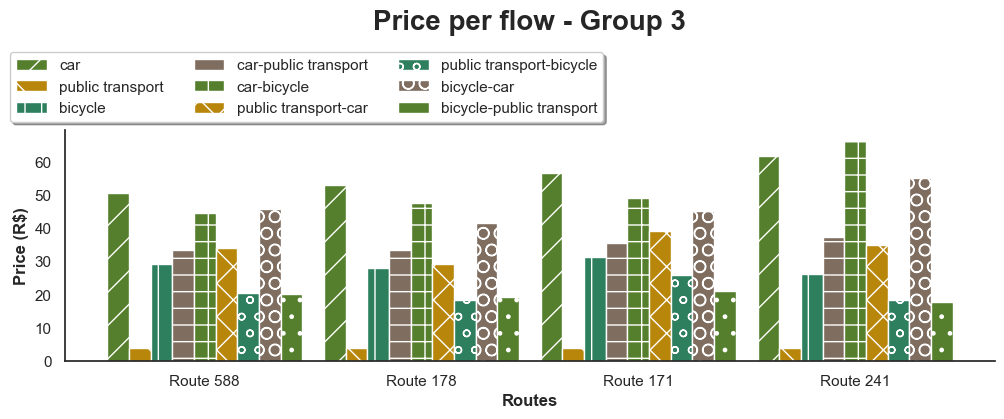

In [9]:
## barplot
rd.seed(10)

translator = {"length": "Length (km)","duration": "Duration (min)","price": "Price (R$)", "emission": "Emission (kg CO2)"}



for j in range(len(distance_wind)):
    print("group",j+1)
    sampl = rd.sample(sorted(windows[j].index),4)
    print("smp of setIDs",sampl)

    group = dataf_new.loc[dataf_new['setID'].isin(sampl)] # group data by sample
    routes = list(map(lambda x: f"Route {int(x)}",sampl)) # route label
 
    for i in ylabels:
        upper = i[0].upper() + i[1:]
        title = f"{upper} per flow - Group {j+1}"
        bars = getBars(group,labels,i)
        print(bars)
        print(ylabels)
        print(routes)
        plotBars(bars,translator[i],labels,routes,title,fname=title)
    

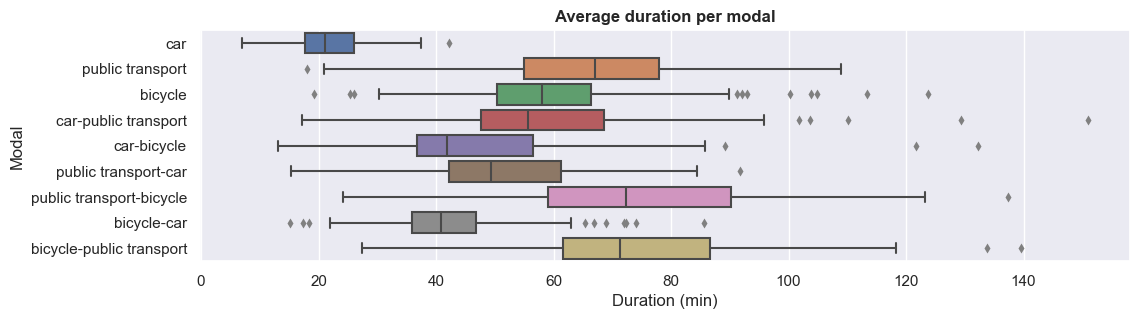

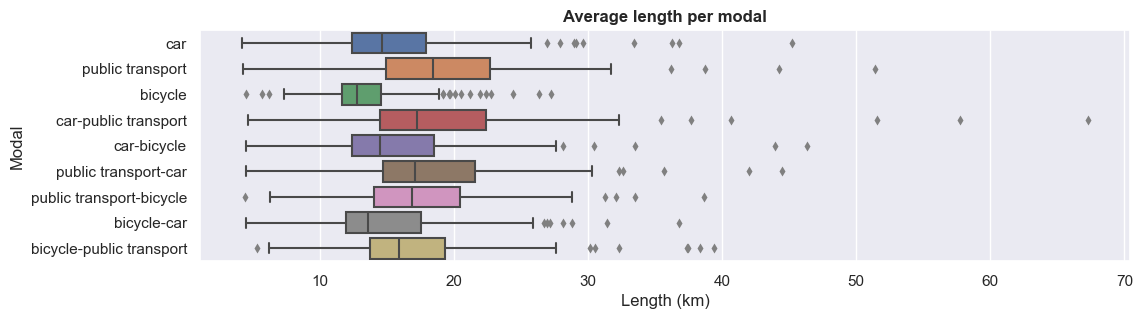

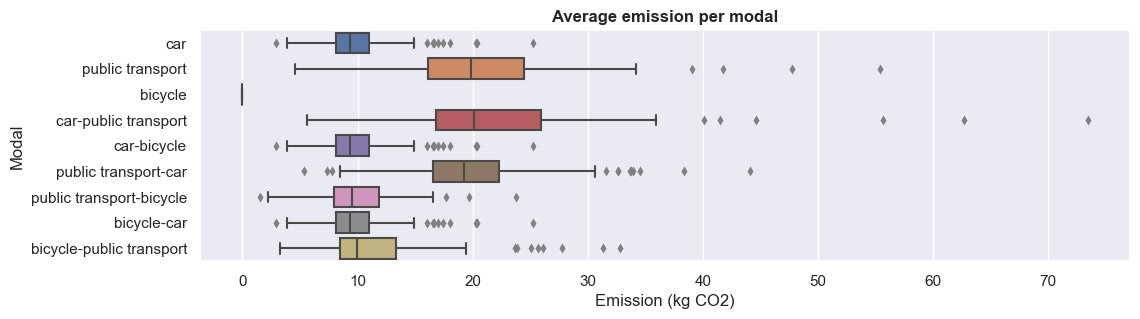

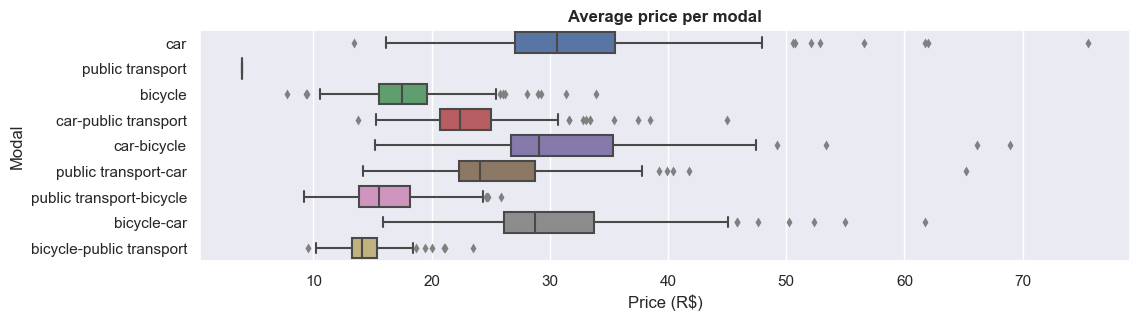

In [10]:
for i in range(len(ylabels)):
    #upper = ylabels[i][0].upper() + ylabels[i][1:]
    title = f"Average {ylabels[i]} per modal"
    plotBoxPlots(dataf_new,"modal",translator[ylabels[i]],title,ylabels[i],fname=title)

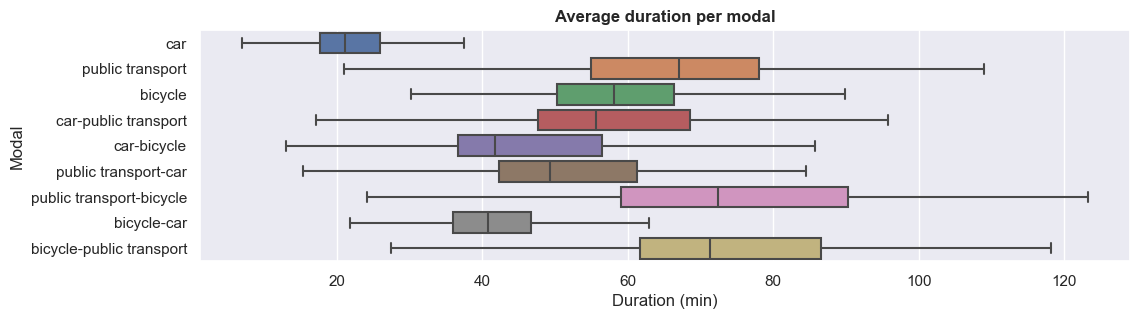

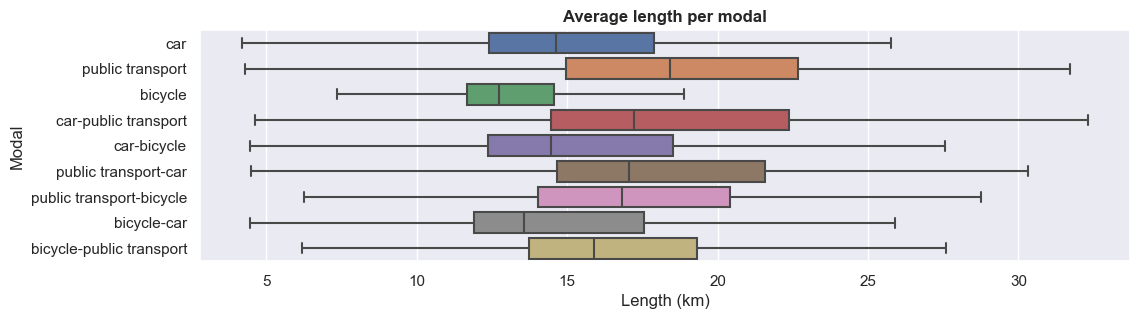

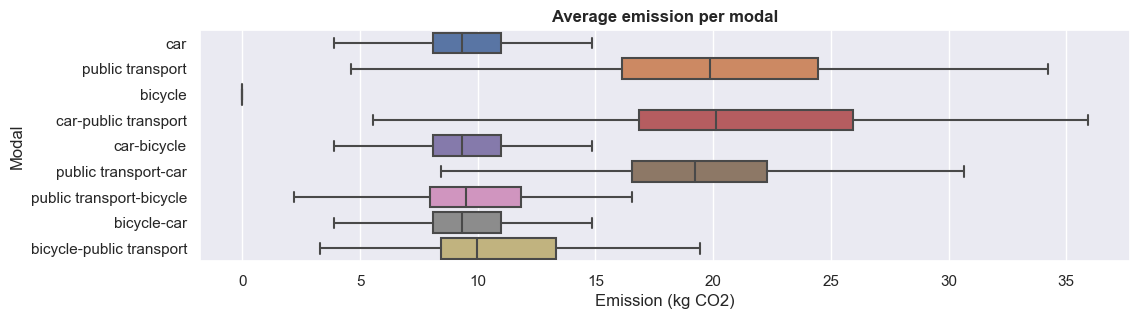

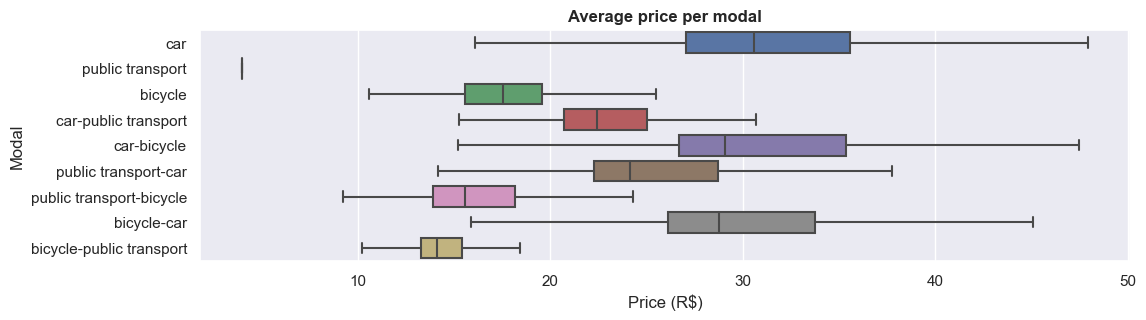

In [11]:
for i in range(len(ylabels)):
    #upper = ylabels[i][0].upper() + ylabels[i][1:]
    title = f"Average {ylabels[i]} per modal"
    plotBoxPlotsClean(dataf_new,"modal",translator[ylabels[i]],title,ylabels[i],fname=title)

In [71]:
series_wind1.value

array([ 4.465,  6.479,  9.089, 14.364, 11.376, 15.331, 15.154, 14.697,
        7.332,  6.417, 12.892, 11.187, 11.384, 11.88 , 15.326, 15.337,
       13.299, 13.485, 12.714, 12.585, 13.992, 14.829, 13.631, 14.112,
       12.948, 12.055, 14.427, 14.514, 14.048, 12.436, 10.558, 14.571,
       12.666, 13.891, 10.932, 11.543, 15.036, 11.585, 12.013, 14.112,
       14.124, 13.913, 14.597, 13.191, 14.279, 13.58 , 14.597, 13.826,
       12.385, 14.715, 13.272, 15.109, 13.28 , 12.404, 14.135, 14.171,
       15.143, 13.568, 11.125, 14.308, 14.107, 12.617, 12.685, 14.815,
       13.154, 13.726, 14.923])

In [74]:
rng1

9        4.202
10       4.272
11       4.465
12       4.613
13       4.471
         ...  
1248    12.546
1249    19.053
1250    17.965
1251    13.772
1252    15.710
Name: length, Length: 603, dtype: float64

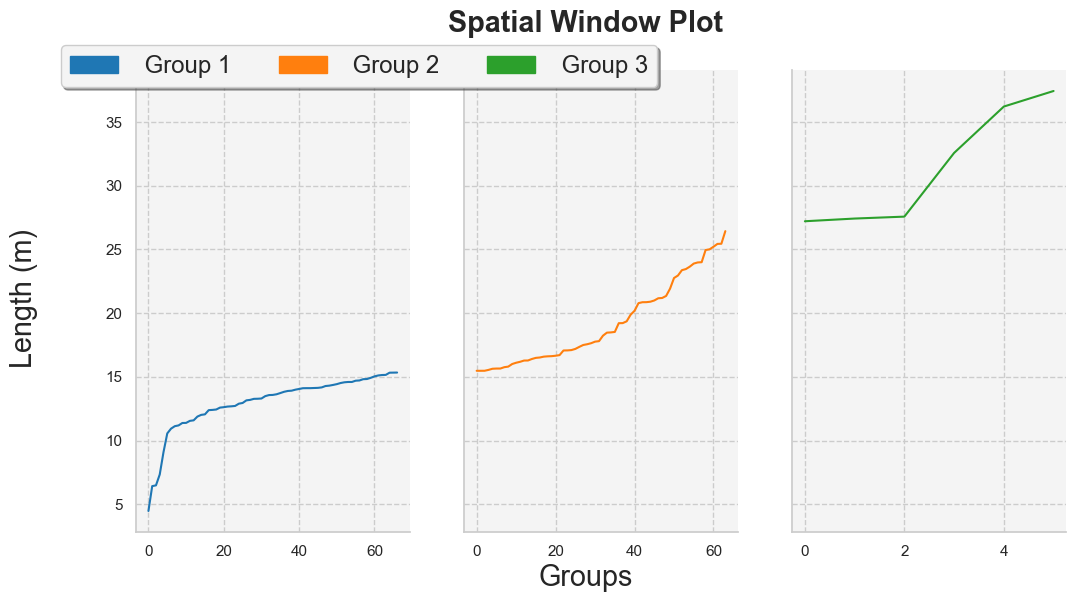

In [75]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=False,sharey=True,
                                    figsize=(12, 6))
values1 = sorted(series_wind1.values.tolist())
values2 = sorted(series_wind2.values.tolist())
values3 = sorted(series_wind3.values.tolist())

ax0.plot(range(len(values1)), values1,color="tab:blue",label='group 1',linestyle="solid")
ax1.plot(range(len(values2)), values2,color="tab:orange",label='group 2',linestyle="solid")
ax2.plot(range(len(values3)), values3,color="tab:green",label='group 3',linestyle="solid")

leg_g1 = mpatches.Patch(color="tab:blue",label=" Group 1")
leg_g2 = mpatches.Patch(color="tab:orange",label=" Group 2")
leg_g3 = mpatches.Patch(color="tab:green",label=" Group 3")

plt.legend(loc="upper right",
           bbox_to_anchor=(-0.45,1.08),
           ncol=3,
           fancybox=True,
           shadow=True,
           fontsize="x-large",
           handles = [leg_g1,leg_g2,leg_g3])

fig.suptitle('Spatial Window Plot',fontsize="xx-large",fontweight="bold")
fig.supxlabel("Groups",fontsize="xx-large")
fig.supylabel("Length (m)",fontsize="xx-large")

sns.set_style("whitegrid", {'grid.linestyle': '--','axes.facecolor': '#F4F4F4'})
plt.savefig('results/plots/groups.pdf',bbox_inches="tight")
sns.despine(top=True,left=False)
plt.show()

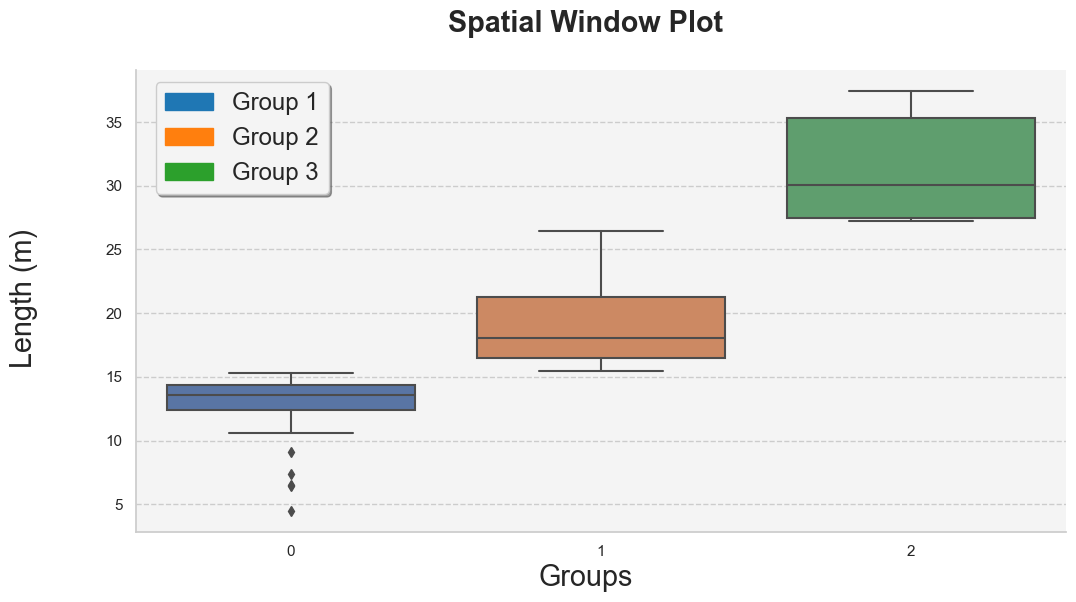

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))

#rng1 = dataf_new.loc[dataf_new['setID'].isin(list(windows[0].index))]['length']
#rng2 = dataf_new.loc[dataf_new['setID'].isin(list(windows[1].index))]['length']
#rng3 = dataf_new.loc[dataf_new['setID'].isin(list(windows[2].index))]['length']
#rng = [rng1,rng2,rng3]

values1 = sorted(series_wind1.values.tolist())
values2 = sorted(series_wind2.values.tolist())
values3 = sorted(series_wind3.values.tolist())
rng = [values1,values2,values3]

sns.boxplot(rng)

leg_g1 = mpatches.Patch(color="tab:blue",label="Group 1")
leg_g2 = mpatches.Patch(color="tab:orange",label="Group 2")
leg_g3 = mpatches.Patch(color="tab:green",label="Group 3")

plt.legend(loc="upper right",
           bbox_to_anchor=(0.22,1),
           ncol=1,
           fancybox=True,
           shadow=True,
           fontsize="x-large",
           handles = [leg_g1,leg_g2,leg_g3])

fig.suptitle('Spatial Window Plot',fontsize="xx-large",fontweight="bold")
fig.supxlabel("Groups",fontsize="xx-large")
fig.supylabel("Length (m)",fontsize="xx-large")

sns.set_style("whitegrid", {'grid.linestyle': '--','axes.facecolor': '#F4F4F4'})
plt.savefig('results/plots/boxGroups.pdf',bbox_inches="tight")
sns.despine(top=True,left=False)
plt.show()

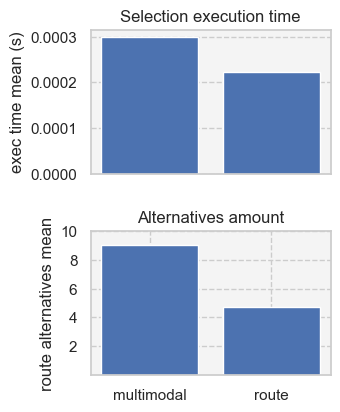

In [ ]:
#df.groupby("setID")['ID'].count().mean()

fig, axs = plt.subplots(2,1)

plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=0.5, 
                    top=1.25, 
                    wspace=0.4, 
                    hspace=0.4)
name = ["multimodal","route"]
value = [exec_dfModal['execution_time (s)'].mean(),exec_dfCriteria['execution_time (s)'].mean()]
value2 = [9,4.685314685314685]
axs[0].bar(name,value)
axs[0].set_title('Selection execution time')
axs[0].set_ylabel("exec time mean (s)")
axs[0].set_xticks([])
axs[1].set_title('Alternatives amount')
axs[1].set_ylabel("route alternatives mean")
axs[1].bar(name,value2)
axs[1].set_yticks([2,4,6,8,10])

plt.savefig("results/plots/execution_time.pdf",bbox_inches="tight")
plt.show()

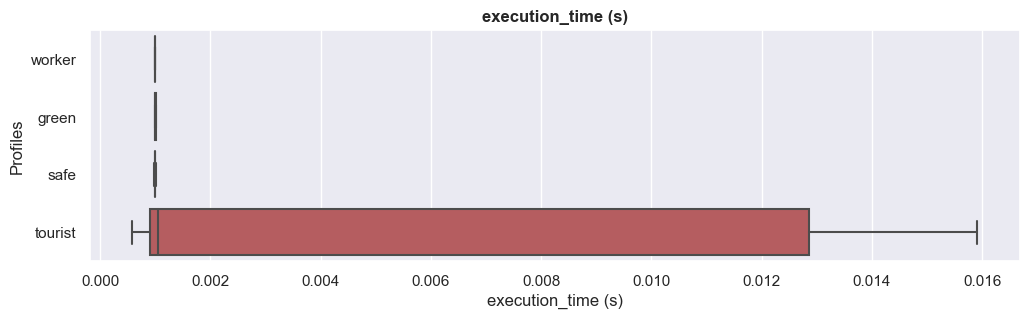

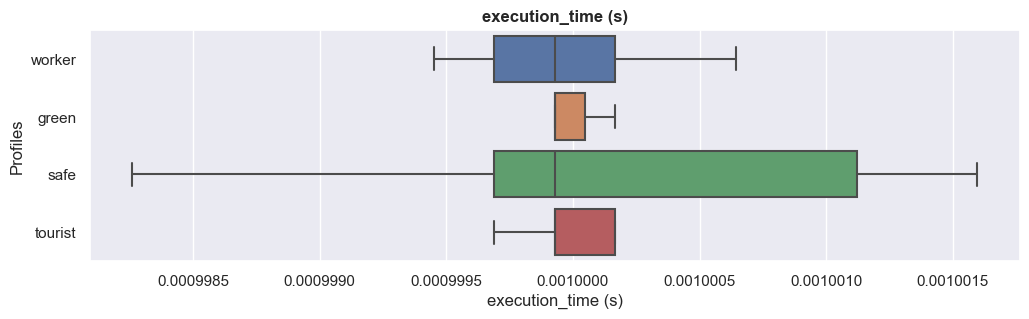

In [ ]:
column = exec_dfModal.columns[2]

exec_dfModal.drop(exec_dfModal[exec_dfModal["execution_time (s)"] == 0].index, inplace = True)
exec_dfCriteria.drop(exec_dfCriteria[exec_dfCriteria["execution_time (s)"] == 0].index, inplace = True)

title = column
plotBoxPlotsClean(exec_dfModal,"profiles",column,title,column,"profiles")

plotBoxPlotsClean(exec_dfCriteria,"profiles",column,title,column,"profiles")